# **01 - Primeiros insights**

- OBS: Nem todos os pré-processamentos referentes a limpezas e features serão feitos neste notebook!

#### **Bibliotecas e importação das bases de dados:**

In [2]:
# Importando as bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### **Importando as bases:**

In [3]:
# Importando as bases de dados
customers = pd.read_csv('../bases_de_dados/bases_originais/olist_customers_dataset.csv')
geolocation = pd.read_csv('../bases_de_dados/bases_originais/olist_geolocation_dataset.csv')
order_items = pd.read_csv('../bases_de_dados/bases_originais/olist_order_items_dataset.csv')
order_payments = pd.read_csv('../bases_de_dados/bases_originais/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('../bases_de_dados/bases_originais/olist_order_reviews_dataset.csv')
orders = pd.read_csv('../bases_de_dados/bases_originais/olist_orders_dataset.csv')
products = pd.read_csv('../bases_de_dados/bases_originais/olist_products_dataset.csv')
sellers = pd.read_csv('../bases_de_dados/bases_originais/olist_sellers_dataset.csv')
product_category = pd.read_csv('../bases_de_dados/bases_originais/product_category_name_translation.csv')

# **Criando os primeiros insights**

# **1. Clientes**

In [4]:
# Visualizando as 5 primeiras linhas
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Visualizando as informações
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
# Visualizando a quantidadevalores únicos por coluna
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [7]:
print("Valores duplicados na coluna 'customer_id':", customers.customer_id.duplicated().sum())
print("Valores duplicados na coluna 'customer_unique_id':", customers.customer_unique_id.duplicated().sum())

Valores duplicados na coluna 'customer_id': 0
Valores duplicados na coluna 'customer_unique_id': 3345


In [8]:
# Valores nulos por coluna
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

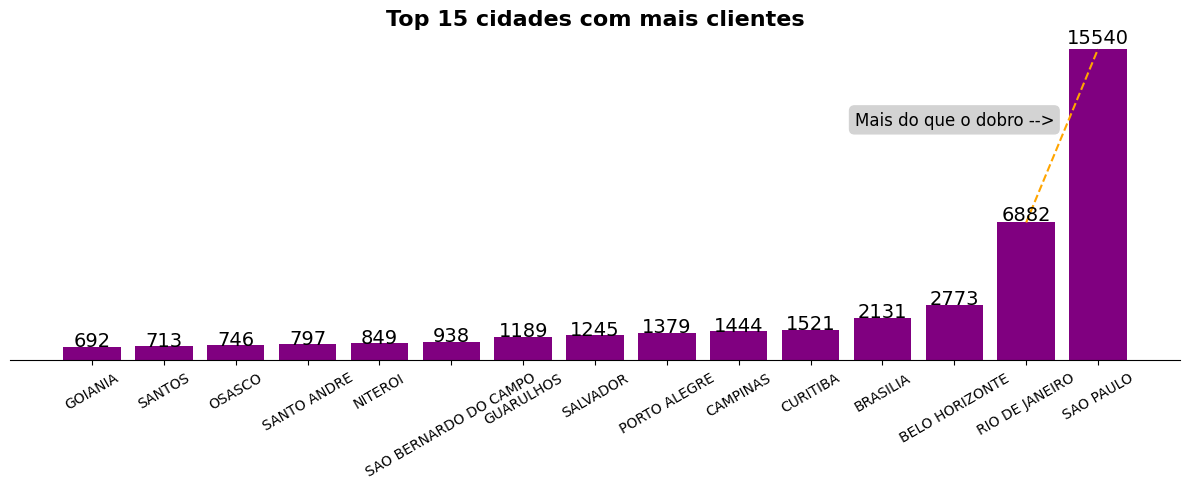

In [9]:
import matplotlib.patches as patches

a = customers.customer_city.value_counts().head(15).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12,5),tight_layout=True)
ax.bar(a.index, a.values,color='purple')
for i in range(15):
    ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.02), ha='center', fontsize=14)
plt.xticks(rotation=30)
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_title('Top 15 cidades com mais clientes', fontweight='bold',fontsize=16)
ax.plot([13,14],[6882,15540],'--', color='orange')

plt.text(12, 12000, 'Mais do que o dobro -->', ha='center', va='center',fontsize=12, color='black',
          bbox=dict(facecolor='lightgray', edgecolor='lightgray', boxstyle='round,pad=0.3'))

# Parte do código abaixo foi retirado no Chat Gpt 3.5
etiquetas_originais = [str(valor) for valor in a.index]
etiquetas_maiusculas = [etiqueta.upper() for etiqueta in etiquetas_originais]
plt.xticks(a.index, etiquetas_maiusculas)

plt.savefig('../imagens/top15cidades_com_mais_clientes_.png', transparent=True)
plt.show()

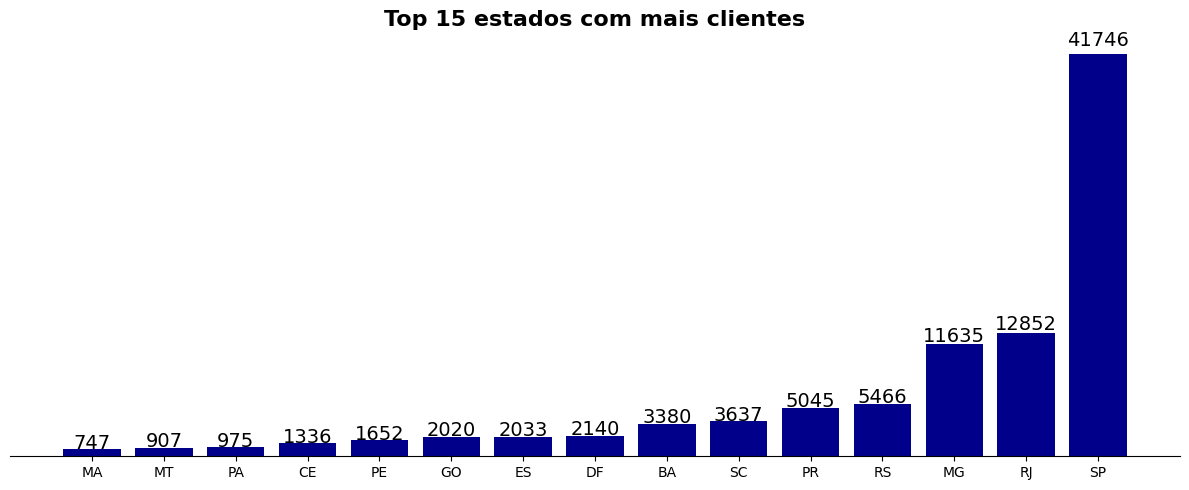

In [10]:
a = customers.customer_state.value_counts().head(15).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12,5),tight_layout=True)
ax.bar(a.index, a.values,color='darkblue')
for i in range(15):
    ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.02), ha='center', fontsize=14)
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_title('Top 15 estados com mais clientes', fontweight='bold',fontsize=16)

plt.savefig('../imagens/top15estadoscommaisclientes.png', transparent=True)
plt.show()

### **Analisando alguns valores referentes a coluna customer_unique_id**

In [11]:
customers.loc[customers.customer_unique_id.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


#### **Analisando alguns valores que se repetem em customer_unique_id**

In [12]:
customers.loc[customers.customer_unique_id == '8bab3162259edfaadd1ea2e1fe7f58dc']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
74114,ffb352544f1296ee263ecd1b69726e43,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG


In [13]:
customers.loc[customers.customer_unique_id == '5cbfdb85ec130898108b32c50d619c39']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
54660,2985f6b30228725ea3b233e6c8b87735,5cbfdb85ec130898108b32c50d619c39,78640,canarana,MT
99406,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO


#### **Analisando o customer_id na base "orders"**

In [14]:
orders.loc[(orders.customer_id == 'ffb352544f1296ee263ecd1b69726e43') |
           (orders.customer_id == '5b46a0d983eec8c97363bea78d4a69dd')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4562,3aefaf9d41208dba8b2c336def99b00f,5b46a0d983eec8c97363bea78d4a69dd,delivered,2017-10-29 11:59:50,2017-10-30 10:12:39,2017-10-31 18:42:00,2017-11-06 21:18:53,2017-11-24 00:00:00
82913,b798fc527c548bfa5f069b5b29195275,ffb352544f1296ee263ecd1b69726e43,delivered,2017-10-29 11:59:52,2017-10-30 09:48:52,2017-10-31 18:31:44,2017-11-06 14:59:01,2017-11-29 00:00:00


In [15]:
orders.loc[(orders.customer_id == '2985f6b30228725ea3b233e6c8b87735') |
           (orders.customer_id == 'd9110683c7a282144e9fc97660026a28')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30526,d640a4c3a88331780424c072148b386d,2985f6b30228725ea3b233e6c8b87735,delivered,2018-03-14 13:42:40,2018-03-16 03:45:32,2018-03-21 21:25:36,2018-04-05 11:28:45,2018-04-11 00:00:00
70452,e65fa5f31ce4436d38bcf5e109fd43e4,d9110683c7a282144e9fc97660026a28,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,2018-02-20 17:48:37,2018-02-19 00:00:00


Nesse caso, houve esses valores duplicados pois a cada pedido, o customer_id é diferente, já o customer_unique_id não. E nesses casos os clientes fizeram mais de uma compra

In [16]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

# **2. Localizações**
- Vou me aprofundar nessa base no notebook de fatores geográficos

In [17]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [18]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [19]:
geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [20]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [21]:
geolocation.loc[geolocation.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


# **3. Itens dos pedidos**

In [22]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [23]:
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [24]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [25]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [26]:
# Mudando a coluna shipping_limit_date para tipo data
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

In [27]:
order_items.duplicated().sum()

0

In [28]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [29]:
order_items.loc[order_items.order_id.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


**Há avlores duplicados no "order_id pois a coluna order_item_id funciona da seguinte forma:**
- Caso um pedido tenha a quantidade prontos sendo 3, há 3 registros na base. Por isso essa quantidade a mais de linhas.

#### **Para deixarmos apenas valores únicos, podemos pegar o maior valor de order_item_id por order_id.**

In [30]:
# Nesse caso, como essa iteração está em ordem, vamos pegar o último valor por order_id
order_items = order_items.drop_duplicates(subset='order_id', keep='last')

#### **Agora vamos incluir a coluna de categoria do produto, através do id do produto**

In [31]:
order_items = pd.merge(order_items, products[['product_id','product_category_name']],on='product_id', how='inner')

In [32]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff


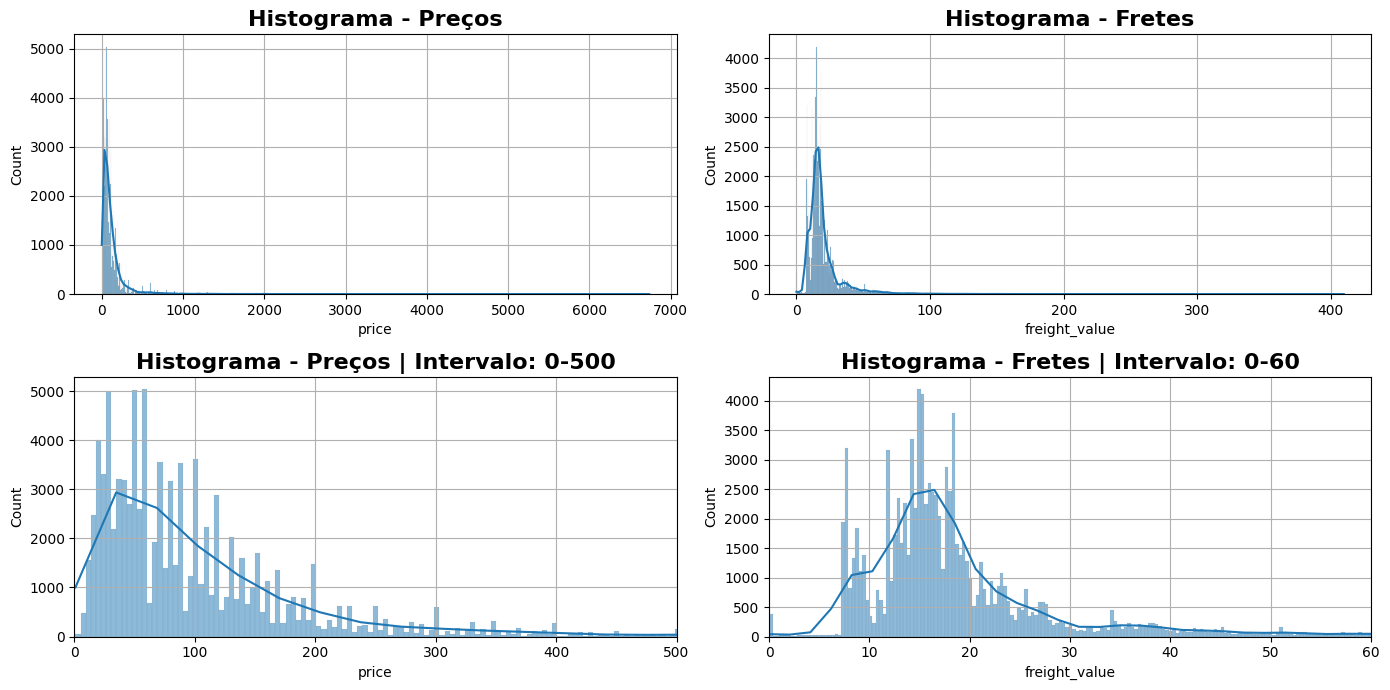

In [33]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(14,7), tight_layout=True)

sns.histplot(order_items.price, kde=True, ax=ax[0][0])
sns.histplot(order_items.freight_value, kde=True, ax=ax[0][1])

sns.histplot(order_items.price, kde=True, ax=ax[1][0])
ax[1][0].set_xlim([0,500])
sns.histplot(order_items.freight_value, kde=True, ax=ax[1][1])
ax[1][1].set_xlim([0,60])

ax[0][0].set_title('Histograma - Preços', fontweight='bold', fontsize=16)
ax[0][1].set_title('Histograma - Fretes', fontweight='bold', fontsize=16)
ax[1][0].set_title('Histograma - Preços | Intervalo: 0-500', fontweight='bold', fontsize=16)
ax[1][1].set_title('Histograma - Fretes | Intervalo: 0-60', fontweight='bold', fontsize=16)
ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()

plt.savefig('../imagens/precos_fretes.png', transparent=True)
plt.show()

# **4. Métodos de pagamento**

Como especificado no site do Kaggle, essa base há registros onde o id do pedido se repete. Isso ocorre devido alguns pagamentos serem feitos através de mais de uma forma, exemplo: cartão de crédito e voucher. Criando assim, mais de uma linha de registro.

In [34]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [35]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [36]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


- **order_id** - ID do pedido
- **payment_sequential** - um cliente pode pagar um pedido com mais de um método de pagamento. Se ele fizer **isso, uma sequência** será criada para
- **payment_type** - Tipo de pagamento do pedido
- **payment_installments** - Número de parcelas
- **payment_value** - Valor do pagamento

In [37]:
order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [38]:
ids = order_payments.loc[order_payments.order_id.duplicated(), 'order_id'].head(5).values
ids

array(['683bf306149bb869980b68d48a1bd6ab',
       'e6a66a8350bb88497954d37688ab123e',
       '8e5148bee82a7e42c5f9ba76161dc51a',
       '816ccd9d21435796e8ffa9802b2a782f',
       '2cbcb371aee438c59b722a21d83597e0'], dtype=object)

In [39]:
order_payments.loc[order_payments.order_id.isin(ids)].sort_values(by=['order_id','payment_sequential'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1793,2cbcb371aee438c59b722a21d83597e0,1,credit_card,5,52.18
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
385,683bf306149bb869980b68d48a1bd6ab,2,voucher,1,30.00
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
44255,816ccd9d21435796e8ffa9802b2a782f,2,voucher,1,111.67
30251,816ccd9d21435796e8ffa9802b2a782f,3,voucher,1,111.67
43559,816ccd9d21435796e8ffa9802b2a782f,4,voucher,1,27.92
815,816ccd9d21435796e8ffa9802b2a782f,5,voucher,1,27.91
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67


**Acima podemos ver que é criada uma sequencia quando isso ocorre**

In [40]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [41]:
order_payments.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [42]:
order_payments.groupby('payment_installments')['payment_value'].median()

payment_installments
0      94.315
1      73.340
2     109.420
3     110.420
4     117.175
5     125.970
6     138.550
7     140.075
8     212.695
9      99.920
10    239.740
11    116.510
12    198.410
13    136.205
14    147.070
15    255.850
16    167.370
17    175.100
18    335.890
20    458.310
21    216.050
22    228.710
23    236.480
24    593.880
Name: payment_value, dtype: float64

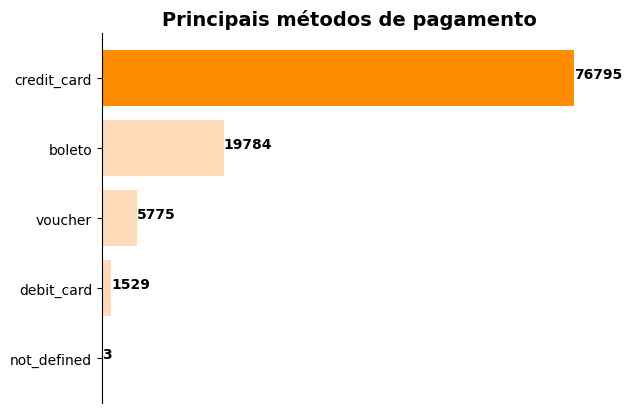

In [147]:
c = order_payments.payment_type.value_counts().sort_values(ascending=True)
fig,ax = plt.subplots()
ax.barh(c.index, c.values, color='#FFDAB9')
ax.barh(c.index[-1], c.values[-1], color='darkorange')
ax.xaxis.set_visible(False)
ax.spines[['top','bottom','right']].set_visible(False)
for i in range(len(c.index)):
    ax.annotate(c.values[i],(c.values[i],c.index[i]), ha='left', fontweight='bold')
    
ax.set_title('Principais métodos de pagamento', fontweight='bold',fontsize=14)
plt.savefig('../imagens/principaismetodospagamento.png', transparent=True)
plt.show()

# **5. Pedidos e avaliações**
- Apenas registros únicos de pedidos e avaliações 
- Não contém valores nulos

In [44]:
pedidos_e_avaliacoes = order_reviews.copy()

In [45]:
pedidos_e_avaliacoes.review_score.value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [46]:
pedidos_e_avaliacoes.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [47]:
pedidos_e_avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### **Convertendo algumas colunas para o tipo data**

In [48]:
# Mudando algumas colunas para o tipo data

pedidos_e_avaliacoes['review_creation_date'] = pd.to_datetime(pedidos_e_avaliacoes['review_creation_date'], format='%Y-%m-%d %H:%M:%S')
pedidos_e_avaliacoes['review_answer_timestamp'] = pd.to_datetime(pedidos_e_avaliacoes['review_answer_timestamp'], format='%Y-%m-%d %H:%M:%S')

#### **Visualizando registros onde o título não é nulo**

In [49]:
# Analisando registros onde o título não é nulo

pedidos_e_avaliacoes.loc[pedidos_e_avaliacoes.review_comment_title.notnull()].head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07,2018-06-09 18:44:02
36,08c9d79ec0eba1d252e3f52f14b8e6a9,e029f708df3cc108b3264558771605c6,5,Bom,"Recomendo ,",2018-06-13,2018-06-13 22:54:44
38,b193ff3c9f32a01f3a0d9ae26b94d244,e2e6ee1ed2d7f2f36b05d234983bd7a0,5,Maravilhoso!,"Tô completamente apaixonada, loja super respon...",2018-08-10,2018-08-11 00:22:13
43,86c5cfa7fcbde303f704b60a78ced7d6,a6456e781cb962cc3f412b04de4fed7b,5,Entrega perfeita,Muito bom. muito cheiroso.,2018-06-13,2018-06-14 17:29:03
53,1edd1a85161468a77e5fcb165be9b294,d8e17cc85323061493b16b68a130bcff,5,Ótimo,NaN,2018-06-02,2018-06-02 23:15:37
59,500c05500aa275953129f49799ee5c73,8a9424899aac432d80d8e580932b5ee9,5,MT lindo,MT lindo,2018-07-25,2018-07-25 21:37:22


In [50]:
# Verificando valores nulos por coluna
pedidos_e_avaliacoes.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### **Renomeando valores nulos das colunas de comentários e títulos das avaliações**

In [51]:
order_reviews.loc[pedidos_e_avaliacoes.review_comment_title.isnull(), 'review_comment_title'] = 'sem_titulo'
order_reviews.loc[pedidos_e_avaliacoes.review_comment_message.isnull(), 'review_comment_message'] = 'sem_comentarios'

In [52]:
print("Quantidade de linhas sem títulos de avaliação:", pedidos_e_avaliacoes.review_comment_title.isnull().sum())
print("Quantidade de linhas sem comentários de avaliação:", pedidos_e_avaliacoes.review_comment_message.isnull().sum())

Quantidade de linhas sem títulos de avaliação: 87656
Quantidade de linhas sem comentários de avaliação: 58247


#### **Visualizando a frequência de notas por rating através de porcentagens**

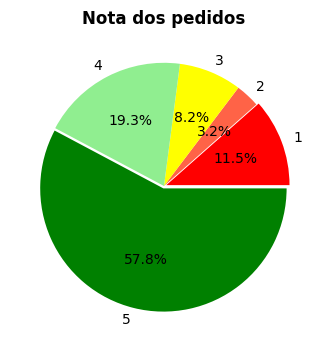

In [53]:
d = pedidos_e_avaliacoes.review_score.value_counts().sort_index(ascending=True)
cores = ['red','tomato','yellow','lightgreen','green']
fig, ax = plt.subplots(figsize=(5,4))
ax.pie(x=d.values, labels=d.index, autopct="%1.1f%%",explode=[0.02,0,0,0,0.02], colors=cores)
ax.set_title('Nota dos pedidos', fontweight='bold', fontsize=12)
plt.savefig('../imagens/notas.png', transparent=True)
plt.show()

In [54]:
# Valores únicos por coluna
pedidos_e_avaliacoes.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [55]:
pedidos_e_avaliacoes.shape[0]

99224

In [56]:
print("Quantidade de linhas da base 'order_reviews' ", order_reviews.shape[0])
print("Quantidade de linhas da base 'orders' ", orders.shape[0])

Quantidade de linhas da base 'order_reviews'  99224
Quantidade de linhas da base 'orders'  99441


**Como podemos ver acima, há ids de reviews que se repetem, havendo mais de uma avaliação**

In [57]:
# Identificador de pedido exclusivo
pedidos_e_avaliacoes.review_id.value_counts() 

7b606b0d57b078384f0b58eac1d41d78    3
dbdf1ea31790c8ecfcc6750525661a9b    3
32415bbf6e341d5d517080a796f79b5c    3
0c76e7a547a531e7bf9f0b99cba071c1    3
4219a80ab469e3fc9901437b73da3f75    3
                                   ..
95e01591b0e69a2fab382b0c562d4e20    1
93611e0327d6a1769d1e68cf3caa242d    1
983c47de74278257f99c4b918fd380f1    1
ca475b77fcc618551ef9d516c3f61b88    1
efe49f1d6f951dd88b51e6ccd4cc548f    1
Name: review_id, Length: 98410, dtype: int64

In [58]:
print(pedidos_e_avaliacoes.review_id.duplicated().sum())
print(pedidos_e_avaliacoes.order_id.duplicated().sum())

814
551


#### **Vamos trabalhar em cima desses valores repetidos.**

- Nesse caso, a nota foi dada mais de uma vez, ou seja, pode ter sido feita uma atualização na nota. Então definirei a ultima nota dada pelo cliente como a nota final.

- **review_answer_timestamp** - Mostra o carimbo de data/hora da resposta da pesquisa de satisfação.

In [59]:
pedidos_e_avaliacoes = pedidos_e_avaliacoes.sort_values(by='review_answer_timestamp', ascending=True)
pedidos_e_avaliacoes = pedidos_e_avaliacoes.drop_duplicates(subset='order_id', keep='last')

In [60]:
pedidos_e_avaliacoes.review_id.duplicated().sum()

578

In [61]:
pedidos_e_avaliacoes.order_id.duplicated().sum()

0

In [62]:
pedidos_e_avaliacoes.shape

(98673, 7)

In [63]:
pedidos_e_avaliacoes.loc[order_reviews.review_id.duplicated()].head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
69594,d6de9b9a11c919860b73e5b421d1ec46,d868cf92a5a1305fc7277c60062e81ac,4,NaN,Recebi o produto na data programada. É fácil d...,2016-10-26,2016-10-28 21:42:42
75532,87159a093663b2a1bb847dbb84879c41,c4f710df20f7d1500da1aef81a993f65,5,NaN,Excelente produto.\r\nVendedor nota 1000,2016-10-29,2016-10-31 20:00:13
36084,9dc50077272395ec4c7dcf0ff89be4fa,c5a468ae781ffb0ec6d36ae89fe512b0,5,NaN,Super Recomendo..Um encanto :-),2017-01-21,2017-01-23 09:57:30
32264,6689aabfeb781e9fc59aceb91b5de579,ed2ea4498bcd56d90d461a23fa47ac56,3,NaN,so demorou um pouco mais valeu,2017-01-25,2017-01-26 02:28:29
84849,8600c6c8b100296750e056f4d4f04f08,b6e5aa946acc4e29e7069510f28a0bce,5,NaN,NaN,2017-01-29,2017-01-29 23:23:17


#### **Verificando registros onde o id do pedido se repete**

In [64]:
pedidos_e_avaliacoes.loc[order_reviews.review_id == '9dc50077272395ec4c7dcf0ff89be4fa']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
19832,9dc50077272395ec4c7dcf0ff89be4fa,4fe2e8b329e56a00aba9b0136b46f00f,5,NaN,Super Recomendo..Um encanto :-),2017-01-21,2017-01-23 09:57:30
36084,9dc50077272395ec4c7dcf0ff89be4fa,c5a468ae781ffb0ec6d36ae89fe512b0,5,NaN,Super Recomendo..Um encanto :-),2017-01-21,2017-01-23 09:57:30


In [65]:
pedidos_e_avaliacoes.loc[order_reviews.review_id == '8600c6c8b100296750e056f4d4f04f08']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
84849,8600c6c8b100296750e056f4d4f04f08,b6e5aa946acc4e29e7069510f28a0bce,5,NaN,NaN,2017-01-29,2017-01-29 23:23:17
74379,8600c6c8b100296750e056f4d4f04f08,f77dc5ef53142abf2e1734622d81f664,5,NaN,NaN,2017-01-29,2017-01-29 23:23:17


In [66]:
pedidos_e_avaliacoes.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87123
review_comment_message     57898
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [67]:
pedidos_e_avaliacoes.shape[0]

98673

In [68]:
pedidos_e_avaliacoes = pd.merge(pedidos_e_avaliacoes, orders[['order_id','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date']],
                         on='order_id', how='left')

In [69]:
pedidos_e_avaliacoes.shape

(98673, 10)

In [70]:
pedidos_e_avaliacoes.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,6916ca4502d6d3bfd39818759d55d536,bfbd0f9bdef84302105ad712db648a6c,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,2016-09-15 12:16:38,2016-11-09 07:47:38,2016-10-04 00:00:00
1,49f695dffa457eaba90d388a5c37e942,e5215415bb6f76fe3b7cb68103a0d1c0,1,NaN,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA",2016-10-09,2016-10-11 14:31:29,2016-10-22 08:25:27,NaN,2016-10-24 00:00:00
2,743d98b1a4782f0646898fc915ef002a,e2144124f98f3bf46939bc5183104041,4,NaN,NaN,2016-10-15,2016-10-16 03:20:17,2016-10-06 20:06:26,2016-10-15 11:00:25,2016-11-28 00:00:00


In [71]:
# Transformando colunas em tipo data
col_datas = ['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date']
for i in col_datas:
    pedidos_e_avaliacoes[i] = pd.to_datetime(pedidos_e_avaliacoes[i], format='%Y-%m-%d %H:%M:%S')

In [72]:
pedidos_e_avaliacoes['diferenca_estimativa_e_entrega'] = (pedidos_e_avaliacoes.order_estimated_delivery_date - pedidos_e_avaliacoes.order_delivered_customer_date).dt.days
pedidos_e_avaliacoes['dia_compra'] = pedidos_e_avaliacoes.order_purchase_timestamp.dt.day
pedidos_e_avaliacoes['mes_compra'] = pedidos_e_avaliacoes.order_purchase_timestamp.dt.month
pedidos_e_avaliacoes['ano_compra'] = pedidos_e_avaliacoes.order_purchase_timestamp.dt.year
pedidos_e_avaliacoes['hora_compra'] = pedidos_e_avaliacoes.order_purchase_timestamp.dt.hour

In [73]:
pedidos_e_avaliacoes.shape

(98673, 15)

In [74]:
pedidos_e_avaliacoes.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,diferenca_estimativa_e_entrega,dia_compra,mes_compra,ano_compra,hora_compra
0,6916ca4502d6d3bfd39818759d55d536,bfbd0f9bdef84302105ad712db648a6c,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,2016-09-15 12:16:38,2016-11-09 07:47:38,2016-10-04,-37.0,15,9,2016,12
1,49f695dffa457eaba90d388a5c37e942,e5215415bb6f76fe3b7cb68103a0d1c0,1,NaN,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA",2016-10-09,2016-10-11 14:31:29,2016-10-22 08:25:27,NaT,2016-10-24,NaN,22,10,2016,8
2,743d98b1a4782f0646898fc915ef002a,e2144124f98f3bf46939bc5183104041,4,NaN,NaN,2016-10-15,2016-10-16 03:20:17,2016-10-06 20:06:26,2016-10-15 11:00:25,2016-11-28,43.0,6,10,2016,20


In [75]:
pedidos_e_avaliacoes.isnull().sum()

review_id                             0
order_id                              0
review_score                          0
review_comment_title              87123
review_comment_message            57898
review_creation_date                  0
review_answer_timestamp               0
order_purchase_timestamp              0
order_delivered_customer_date      2843
order_estimated_delivery_date         0
diferenca_estimativa_e_entrega     2843
dia_compra                            0
mes_compra                            0
ano_compra                            0
hora_compra                           0
dtype: int64

In [76]:
a = pedidos_e_avaliacoes.loc[pedidos_e_avaliacoes.review_id.duplicated(),'review_id'].head(10).values

In [77]:
pedidos_e_avaliacoes.loc[pedidos_e_avaliacoes.review_id.isin(a)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,diferenca_estimativa_e_entrega,dia_compra,mes_compra,ano_compra,hora_compra
113,d6de9b9a11c919860b73e5b421d1ec46,d868cf92a5a1305fc7277c60062e81ac,4,NaN,Recebi o produto na data programada. É fácil d...,2016-10-26,2016-10-28 21:42:42,2016-10-08 17:43:26,2016-10-26 12:58:25,2016-12-14,48.0,8,10,2016,17
114,d6de9b9a11c919860b73e5b421d1ec46,6b5e619dedba6d4297fb10dd5886912f,4,NaN,Recebi o produto na data programada. É fácil d...,2016-10-26,2016-10-28 21:42:42,2016-10-08 17:43:25,2016-10-20 22:09:06,2016-11-30,40.0,8,10,2016,17
145,87159a093663b2a1bb847dbb84879c41,b19169c7cb8391fb8561e094d61c531a,5,NaN,Excelente produto.\r\nVendedor nota 1000,2016-10-29,2016-10-31 20:00:13,2016-10-10 15:49:59,2016-10-28 14:43:41,2016-12-02,34.0,10,10,2016,15
146,87159a093663b2a1bb847dbb84879c41,c4f710df20f7d1500da1aef81a993f65,5,NaN,Excelente produto.\r\nVendedor nota 1000,2016-10-29,2016-10-31 20:00:13,2016-10-10 15:50:01,2016-10-26 16:35:46,2016-12-14,48.0,10,10,2016,15
370,9dc50077272395ec4c7dcf0ff89be4fa,4fe2e8b329e56a00aba9b0136b46f00f,5,NaN,Super Recomendo..Um encanto :-),2017-01-21,2017-01-23 09:57:30,2017-01-13 11:06:56,2017-01-20 11:33:43,2017-02-24,34.0,13,1,2017,11
371,9dc50077272395ec4c7dcf0ff89be4fa,c5a468ae781ffb0ec6d36ae89fe512b0,5,NaN,Super Recomendo..Um encanto :-),2017-01-21,2017-01-23 09:57:30,2017-01-13 11:06:56,NaT,2017-02-13,NaN,13,1,2017,11
390,6689aabfeb781e9fc59aceb91b5de579,ed2ea4498bcd56d90d461a23fa47ac56,3,NaN,so demorou um pouco mais valeu,2017-01-25,2017-01-26 02:28:29,2017-01-14 23:05:01,2017-01-24 13:47:47,2017-02-24,30.0,14,1,2017,23
391,6689aabfeb781e9fc59aceb91b5de579,df410b19c3e348fb548ae68badd49827,3,NaN,so demorou um pouco mais valeu,2017-01-25,2017-01-26 02:28:29,2017-01-14 23:05:01,2017-01-24 15:11:39,2017-02-14,20.0,14,1,2017,23
459,8600c6c8b100296750e056f4d4f04f08,b6e5aa946acc4e29e7069510f28a0bce,5,NaN,NaN,2017-01-29,2017-01-29 23:23:17,2017-01-15 17:58:42,2017-01-28 07:58:59,2017-03-01,31.0,15,1,2017,17
460,8600c6c8b100296750e056f4d4f04f08,f77dc5ef53142abf2e1734622d81f664,5,NaN,NaN,2017-01-29,2017-01-29 23:23:17,2017-01-15 17:58:43,2017-01-26 15:11:47,2017-02-17,21.0,15,1,2017,17


#### **Deixando apenas valores de review_id únicos. Permanecendo com os últimos, de acordo coo a coluna de carimbo da avaliação**

In [78]:
pedidos_e_avaliacoes = pedidos_e_avaliacoes.drop_duplicates(subset='review_id', keep='last')

In [79]:
pedidos_e_avaliacoes.shape

(98095, 15)

In [80]:
pedidos_e_avaliacoes.nunique()

review_id                         98095
order_id                          98095
review_score                          5
review_comment_title               4525
review_comment_message            36060
review_creation_date                636
review_answer_timestamp           97933
order_purchase_timestamp          97729
order_delivered_customer_date     94500
order_estimated_delivery_date       459
diferenca_estimativa_e_entrega      196
dia_compra                           31
mes_compra                           12
ano_compra                            3
hora_compra                          24
dtype: int64

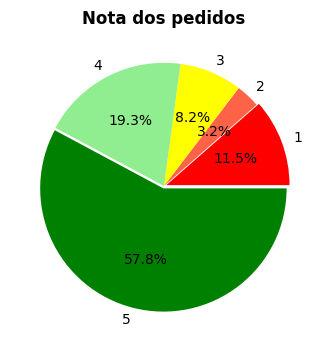

In [81]:
d = pedidos_e_avaliacoes.review_score.value_counts().sort_index(ascending=True)
cores = ['red','tomato','yellow','lightgreen','green']
fig, ax = plt.subplots(figsize=(5,4))
ax.pie(x=d.values, labels=d.index, autopct="%1.1f%%",explode=[0.02,0,0,0,0.02], colors=cores)
ax.set_title('Nota dos pedidos', fontweight='bold', fontsize=12)
plt.savefig('../imagens/notas.png', transparent=True)
plt.show()

**Obs:**
- Criei uma base onde o order_id não se repete

# **6. Todos os pedidos**
- Inclui avaliações nulas
- Inclui reviews que se repetem

- **order_id** - identificador exclusivo do pedido.
- **customer_id** - chave para o conjunto de dados do cliente. Cada pedido possui um customer_id exclusivo.
- **order_status** - Referência ao estado da encomenda (entregue, expedida, etc).
- **order_purchase_timestamp** - Mostra o carimbo de data/hora da compra.
- **order_approved_at** - Mostra o carimbo de data/hora de aprovação do pagamento.
- **order_delivered_carrier_date** - Mostra o carimbo de data/hora de postagem do pedido. Quando foi entregue ao parceiro logístico.
- **order_delivered_customer_date** - Mostra a data real de entrega do pedido ao cliente.
- **order_estimated_delivery_date** - Mostra a data estimada de entrega que foi informada ao cliente no momento da compra.

In [82]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [83]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [84]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [85]:
orders.order_id.duplicated().sum()

0

In [86]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [87]:
orders.loc[orders.order_status != "delivered"].shape[0]

2963

In [88]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

#### **Trazendo a coluna de notas para a base de pedidos** 

In [89]:
orders1 = pd.merge(orders, order_reviews, on='order_id', how='left')

In [90]:
orders1.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
review_id                        98410
review_score                         5
review_comment_title              4528
review_comment_message           36160
review_creation_date               636
review_answer_timestamp          98248
dtype: int64

In [91]:
orders1.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1793
order_delivered_customer_date    2987
order_estimated_delivery_date       0
review_id                         768
review_score                      768
review_comment_title              768
review_comment_message            768
review_creation_date              768
review_answer_timestamp           768
dtype: int64

**Há 768 registros sem avaliações**

#### **Avaliando médias das notas em pedidos entregues e não entregues**

In [92]:
# Transformando colunas em tipo data
col_datas = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
for i in col_datas:
    orders1[i] = pd.to_datetime(orders1[i], format='%Y-%m-%d %H:%M:%S')

In [93]:
orders1 = orders1.drop(['order_approved_at','order_approved_at'], axis=1)

In [94]:
pedidos_nao_entregues = orders1.loc[orders1.order_status != "delivered"]
pedidos_entregues = orders1.loc[orders1.order_status == "delivered"]

In [95]:
pedidos_nao_entregues.groupby('order_status')['review_score'].mean()

order_status
approved       2.500000
canceled       1.811166
created        2.333333
invoiced       1.661342
processing     1.277027
shipped        2.008629
unavailable    1.530988
Name: review_score, dtype: float64

In [96]:
pedidos_entregues.review_score.mean()

4.155716524320005

In [97]:
orders1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99991
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99992 non-null  object        
 1   customer_id                    99992 non-null  object        
 2   order_status                   99992 non-null  object        
 3   order_purchase_timestamp       99992 non-null  datetime64[ns]
 4   order_delivered_carrier_date   98199 non-null  datetime64[ns]
 5   order_delivered_customer_date  97005 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99992 non-null  datetime64[ns]
 7   review_id                      99224 non-null  object        
 8   review_score                   99224 non-null  float64       
 9   review_comment_title           99224 non-null  object        
 10  review_comment_message         99224 non-null  object        
 11  review_creation

**Há 768 produtos não avaliados**

In [98]:
orders1.order_id.value_counts()

8e17072ec97ce29f0e1f111e598b0c85    3
03c939fd7fd3b38f8485a0f95798f1f6    3
c88b1d1b157a9999ce368f218a407141    3
df56136b8031ecd28e200bb18e6ddb2e    3
95442deb81a5d91c97c0df96b431634a    2
                                   ..
94a1020970476388adf12c46628499be    1
b266c12d9bececa3942c1bef84f13716    1
e82e0697786dcef38c215ec9d2dc308a    1
e940e33cefca8e48b759474760c2fb41    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: order_id, Length: 99441, dtype: int64

In [99]:
orders1.loc[orders1.order_id == '8e17072ec97ce29f0e1f111e598b0c85']

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
63713,8e17072ec97ce29f0e1f111e598b0c85,9e29cde4ddb42f9330bcf3c9bc23d177,delivered,2018-03-31 15:08:21,2018-04-03 15:58:24,2018-04-06 17:38:34,2018-05-04,67c2557eb0bd72e3ece1e03477c9dff5,1.0,sem_titulo,Entregou o produto errado.,2018-04-07 00:00:00,2018-04-08 22:48:27
63714,8e17072ec97ce29f0e1f111e598b0c85,9e29cde4ddb42f9330bcf3c9bc23d177,delivered,2018-03-31 15:08:21,2018-04-03 15:58:24,2018-04-06 17:38:34,2018-05-04,2d6ac45f859465b5c185274a1c929637,1.0,sem_titulo,Comprei 3 unidades do produto vieram 2 unidade...,2018-04-07 00:00:00,2018-04-07 21:13:05
63715,8e17072ec97ce29f0e1f111e598b0c85,9e29cde4ddb42f9330bcf3c9bc23d177,delivered,2018-03-31 15:08:21,2018-04-03 15:58:24,2018-04-06 17:38:34,2018-05-04,6e4c4086d9611ae4cc0cc65a262751fe,1.0,sem_titulo,"Embora tenha entregue dentro do prazo, não env...",2018-04-14 00:00:00,2018-04-16 11:37:31


In [100]:
orders1.loc[orders1.order_id == '03c939fd7fd3b38f8485a0f95798f1f6']

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
12430,03c939fd7fd3b38f8485a0f95798f1f6,2a35ad9f439dfc62d35a0202e71d6c66,delivered,2018-02-25 21:01:08,2018-02-26 22:46:40,2018-03-19 21:48:52,2018-04-02,b04ed893318da5b863e878cd3d0511df,3.0,sem_titulo,Um ponto negativo que achei foi a cobrança de ...,2018-03-20 00:00:00,2018-03-21 02:28:23
12431,03c939fd7fd3b38f8485a0f95798f1f6,2a35ad9f439dfc62d35a0202e71d6c66,delivered,2018-02-25 21:01:08,2018-02-26 22:46:40,2018-03-19 21:48:52,2018-04-02,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,4.0,sem_titulo,sem_comentarios,2018-03-29 00:00:00,2018-03-30 00:29:09
12432,03c939fd7fd3b38f8485a0f95798f1f6,2a35ad9f439dfc62d35a0202e71d6c66,delivered,2018-02-25 21:01:08,2018-02-26 22:46:40,2018-03-19 21:48:52,2018-04-02,405eb2ea45e1dbe2662541ae5b47e2aa,3.0,sem_titulo,Seria ótimo se tivesem entregue os 3 (três) pe...,2018-03-06 00:00:00,2018-03-06 19:50:32


In [101]:
orders1.review_id.isnull().sum()

768

In [102]:
orders1.review_id.value_counts()

2d6ac45f859465b5c185274a1c929637    3
9e25d6e3025e9b9a0fc7f03588d33e2b    3
39b4603793c1c7f5f36d809b4a218664    3
308316408775d1600dad81bd3184556d    3
70509c441d994fa03d6c1457930c9024    3
                                   ..
9c04fb7fa87a3769c9e85e09ec8e9225    1
930d4a4d69693048974e8e1b597aa2fc    1
0e7b808be7a8ee6c147b3d3744d44a10    1
fda6a0513db7c1a3b798b259ef73f29d    1
dc9c59b4688062c25758c2be4cafc523    1
Name: review_id, Length: 98410, dtype: int64

In [103]:
orders1.loc[orders1.review_id.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 19:39:23,NaT,2018-02-07,NaN,NaN,NaN,NaN,NaN,NaN
311,4906eeadde5f70b308c20c4a8f20be02,4e7656e34357b93f14b40c6400ca3f6e,delivered,2017-12-08 04:45:26,2017-12-12 17:43:21,2018-01-09 18:04:58,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN
382,b7a4a9ecb1cd3ef6a3e36a48e200e3be,c3d8fc500d86b1c961ee144395c13a57,delivered,2017-05-19 18:13:54,2017-05-30 12:43:50,2017-06-08 07:53:42,2017-06-16,NaN,NaN,NaN,NaN,NaN,NaN
390,59b32faedc12322c672e95ec3716d614,5baa82a2c45fa3220cb57d9881db3211,delivered,2018-06-27 11:10:11,2018-06-28 14:57:00,2018-07-06 16:37:36,2018-07-26,NaN,NaN,NaN,NaN,NaN,NaN
410,c2215076050fa358934105b15c34cf3b,19e7a88b34ef70d108e660c6eb33e82a,delivered,2017-07-16 10:04:36,2017-07-20 17:42:22,2017-07-26 20:32:17,2017-08-04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99748,26ccc2faacfa3bde877ac3d843a8eefa,d1603f4303610971154e335f5004957d,delivered,2018-02-07 01:24:26,2018-02-08 19:41:38,2018-02-14 17:49:07,2018-02-23,b80a2066c15ae9f2d92836a92cfd8cc5,5.0,sem_titulo,sem_comentarios,2018-02-15 00:00:00,2018-02-17 22:50:47
99755,79ce3a0a9eba49ff442b392ab05349a4,3b979b88fbf88354add6870de52d007b,delivered,2017-12-12 23:41:30,2017-12-13 17:53:38,2017-12-26 19:32:07,2018-01-09,601798aaf8bd13bdb3b80732a36b13c8,5.0,sem_titulo,sem_comentarios,2017-12-27 00:00:00,2017-12-27 23:45:51
99773,f0dd9af88d8ef5a8e4670fbbedaf19c4,30ddb50bd22ee927ebe308ea3da60735,delivered,2017-09-02 20:38:29,2017-09-14 23:13:41,2017-09-15 14:59:50,2017-09-19,1c7e1a24358cea9db1eecc6987843a28,5.0,sem_titulo,sem_comentarios,2017-09-16 00:00:00,2017-09-17 18:00:10
99796,dff2b9b8d7cfc595836945e1443789c3,2436fb2666a65fbacae82532e797cabf,delivered,2018-07-16 12:59:02,2018-07-17 15:08:00,2018-07-20 20:41:32,2018-08-07,NaN,NaN,NaN,NaN,NaN,NaN


#### **Atribuindo a última nota dada, tendo como parâmetro a order_id, de acordo com o carimbo**

In [104]:
orders1 = orders1.sort_values(by='review_answer_timestamp', ascending=True)
orders1 = orders1.drop_duplicates(subset='order_id', keep='last')

In [105]:
orders1.shape

(99441, 13)

In [106]:
orders1.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
review_id                         768
review_score                      768
review_comment_title              768
review_comment_message            768
review_creation_date              768
review_answer_timestamp           768
dtype: int64

In [107]:
orders1.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
30868,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,sem_titulo,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28
53968,e5215415bb6f76fe3b7cb68103a0d1c0,b6f6cbfc126f1ae6723fe2f9b3751208,canceled,2016-10-22 08:25:27,NaT,NaT,2016-10-24,49f695dffa457eaba90d388a5c37e942,1.0,sem_titulo,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA",2016-10-09 00:00:00,2016-10-11 14:31:29
27632,e2144124f98f3bf46939bc5183104041,bd0342f59a3b8ddc416bd048b2b5d0fb,delivered,2016-10-06 20:06:26,2016-10-12 11:00:25,2016-10-15 11:00:25,2016-11-28,743d98b1a4782f0646898fc915ef002a,4.0,sem_titulo,sem_comentarios,2016-10-15 00:00:00,2016-10-16 03:20:17


In [108]:
orders1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 30868 to 99796
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 5   order_delivered_customer_date  96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 7   review_id                      98673 non-null  object        
 8   review_score                   98673 non-null  float64       
 9   review_comment_title           98673 non-null  object        
 10  review_comment_message         98673 non-null  object        
 11  review_crea

In [109]:
orders1.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
30868,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,sem_titulo,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28
53968,e5215415bb6f76fe3b7cb68103a0d1c0,b6f6cbfc126f1ae6723fe2f9b3751208,canceled,2016-10-22 08:25:27,NaT,NaT,2016-10-24,49f695dffa457eaba90d388a5c37e942,1.0,sem_titulo,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA",2016-10-09 00:00:00,2016-10-11 14:31:29
27632,e2144124f98f3bf46939bc5183104041,bd0342f59a3b8ddc416bd048b2b5d0fb,delivered,2016-10-06 20:06:26,2016-10-12 11:00:25,2016-10-15 11:00:25,2016-11-28,743d98b1a4782f0646898fc915ef002a,4.0,sem_titulo,sem_comentarios,2016-10-15 00:00:00,2016-10-16 03:20:17


In [110]:
orders1['diferenca_estimativa_e_entrega'] = (orders1.order_estimated_delivery_date - orders1.order_delivered_customer_date).dt.days
orders1['dia_compra'] = orders1.order_purchase_timestamp.dt.day
orders1['mes_compra'] = orders1.order_purchase_timestamp.dt.month
orders1['ano_compra'] = orders1.order_purchase_timestamp.dt.year
orders1['hora_compra'] = orders1.order_purchase_timestamp.dt.hour

In [111]:
orders1.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
order_estimated_delivery_date        0
review_id                          768
review_score                       768
review_comment_title               768
review_comment_message             768
review_creation_date               768
review_answer_timestamp            768
diferenca_estimativa_e_entrega    2965
dia_compra                           0
mes_compra                           0
ano_compra                           0
hora_compra                          0
dtype: int64

In [112]:
orders1.loc[orders1.review_comment_title.isnull(), 'review_comment_title'] = 'sem_titulo'
orders1.loc[orders1.review_comment_message.isnull(), 'review_comment_message'] = 'sem_comentarios'

In [113]:
print("Maior tempo de atraso", orders1.diferenca_estimativa_e_entrega.max())
print("Dia com mais compras", orders1.dia_compra.value_counts().head(1).index.values[0])
print("Mês com mais compras", orders1.mes_compra.value_counts().head(1).index.values[0])

Maior tempo de atraso 146.0
Dia com mais compras 24
Mês com mais compras 8


In [114]:
orders1.groupby('review_score')['diferenca_estimativa_e_entrega'].mean()

review_score
1.0     3.043827
2.0     7.630264
3.0     9.760515
4.0    11.385642
5.0    12.384465
Name: diferenca_estimativa_e_entrega, dtype: float64

In [115]:
orders1.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [116]:
orders1.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

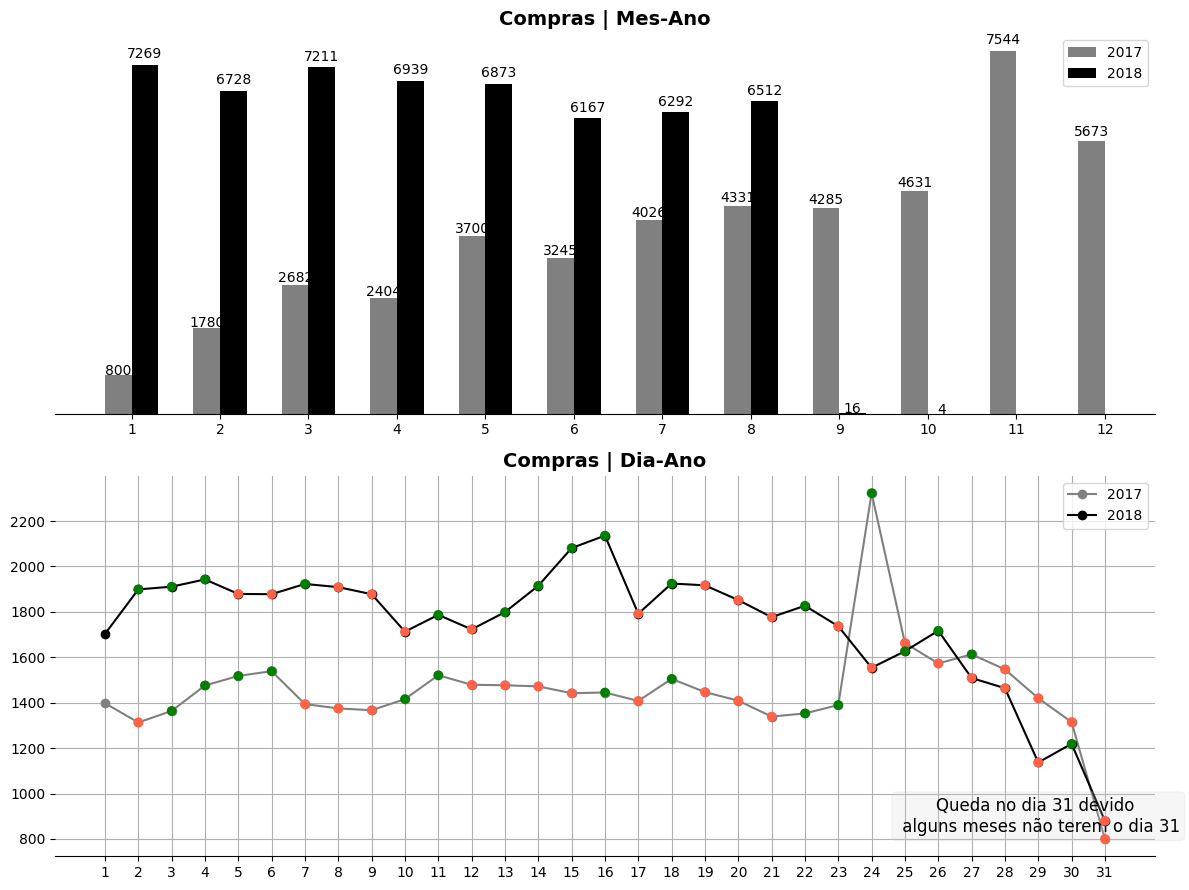

In [117]:
orders2016 = orders1.loc[orders1.ano_compra == 2016]
orders2017 = orders1.loc[orders1.ano_compra == 2017]
orders2018 = orders1.loc[orders1.ano_compra == 2018]

fig, ax = plt.subplots(nrows=2, figsize=(12,9), tight_layout=True)

a = orders2017.mes_compra.value_counts().sort_index()
b = orders2018.mes_compra.value_counts().sort_index()
c = orders2017.dia_compra.value_counts().sort_index()
d = orders2018.dia_compra.value_counts().sort_index()

w = 0.3

ax[0].bar(a.index-w/2,a.values, color='gray', width=w, label='2017')
for i in range(len(a.index)):
    ax[0].annotate(a.values[i],(a.index[i]-w/2,a.values[i]+a.values[i]*0.02),ha='center')

ax[0].bar(b.index+w/2,b.values, color='black', width=w, label='2018')
for i in range(len(b.index)):
    ax[0].annotate(b.values[i],(b.index[i]+w/2,b.values[i]+b.values[i]*0.02),ha='center')
    
ax[0].set_title('Compras | Mes-Ano', fontweight='bold',fontsize=14)   
ax[0].set_xticks(np.arange(1,13))
ax[0].legend()
ax[0].spines[['top','left','right']].set_visible(False)
ax[0].yaxis.set_visible(False)


ax[1].plot(c.index,c.values, color='gray',label='2017', marker='o')
ax[1].plot(d.index,d.values, color='black',label='2018', marker='o')
ax[1].set_title('Compras | Dia-Ano', fontweight='bold',fontsize=14)

# Código com ajuda do chat GPT 3.5
cores = ['green' if c.values[i] < c.values[i+1] else 'tomato' for i in range(len(c.values)-1)]
ax[1].scatter(c.index[1:], c.values[1:], color=cores, marker='o', zorder=5)
cores = ['green' if d.values[i] < d.values[i+1] else 'tomato' for i in range(len(d.values)-1)]
ax[1].scatter(d.index[1:], d.values[1:], color=cores, marker='o', zorder=5)
# ----------------------------
ax[1].set_xticks(np.arange(1,32))
ax[1].legend()
ax[1].spines[['top','left','right']].set_visible(False)
ax[1].grid()
ax[1].text(29, 900, 'Queda no dia 31 devido \n alguns meses não terem o dia 31', 
           ha='center', va='center',fontsize=12, color='black',
           bbox=dict(facecolor='lightgray', edgecolor='lightgray', boxstyle='round,pad=0.3', alpha=0.2))
plt.savefig('../imagens/compras_dias_meses_anos.png', transparent=True)
plt.show()

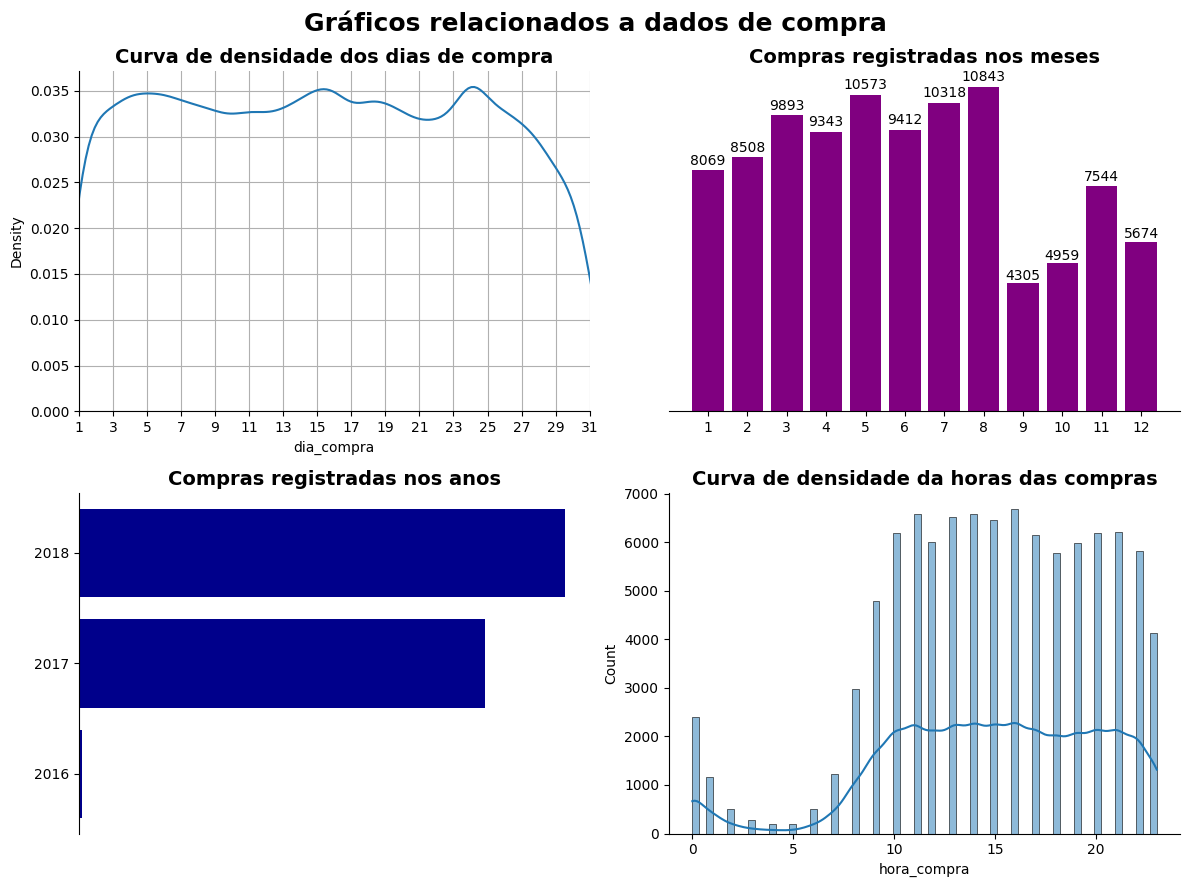

In [118]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,9), tight_layout=True)
a = orders1.dia_compra.value_counts().sort_index(ascending=True)
b = orders1.mes_compra.value_counts().sort_index(ascending=True)
c = orders1.ano_compra.value_counts().sort_index(ascending=True)
d = orders1.hora_compra.value_counts().head(10).sort_index(ascending=True)

sns.kdeplot(data=orders1.dia_compra, ax=ax[0][0])
ax[0][0].set_xlim(1,31)
ax[0][0].set_title('Curva de densidade dos dias de compra', fontweight='bold',fontsize=14)
ax[0][0].set_xticks([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31])
ax[0][0].grid()

ax[0][1].bar(b.index,b.values, color='purple')
ax[0][1].set_title('Compras registradas nos meses', fontweight='bold',fontsize=14)
for i in range(len(b.index)):
    ax[0][1].annotate(b.values[i],(b.index[i],b.values[i]+b.values[i]*0.02),ha='center')
ax[0][1].set_xticks(b.index)

ax[1][0].barh(c.index,c.values, color='darkblue')
ax[1][0].set_title('Compras registradas nos anos', fontweight='bold',fontsize=14)
ax[1][0].set_yticks(c.index)
ax[1][0].xaxis.set_visible(False)

sns.histplot(orders1.hora_compra, kde=True, ax=ax[1][1])
ax[1][1].set_title('Curva de densidade da horas das compras', fontweight='bold',fontsize=14)

ax[0][0].spines[['top','right']].set_visible(False)
ax[0][1].yaxis.set_visible(False)
ax[0][1].spines[['top','left','right']].set_visible(False)
ax[1][0].spines[['top','bottom','right']].set_visible(False)
ax[1][1].spines[['top','right']].set_visible(False)
plt.suptitle('Gráficos relacionados a dados de compra',fontweight='bold',fontsize=18)

plt.savefig('../imagens/compras_horas_dias_meses_anos_.png', transparent=True)
plt.show()

**Dias da semana**

In [119]:
orders1['dia_semana_compra'] =  orders1['order_purchase_timestamp'].dt.strftime('%A')
orders1

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,diferenca_estimativa_e_entrega,dia_compra,mes_compra,ano_compra,hora_compra,dia_semana_compra
30868,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,sem_titulo,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,-37.0,15,9,2016,12,Thursday
53968,e5215415bb6f76fe3b7cb68103a0d1c0,b6f6cbfc126f1ae6723fe2f9b3751208,canceled,2016-10-22 08:25:27,NaT,NaT,2016-10-24,49f695dffa457eaba90d388a5c37e942,1.0,sem_titulo,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA",2016-10-09 00:00:00,2016-10-11 14:31:29,NaN,22,10,2016,8,Saturday
27632,e2144124f98f3bf46939bc5183104041,bd0342f59a3b8ddc416bd048b2b5d0fb,delivered,2016-10-06 20:06:26,2016-10-12 11:00:25,2016-10-15 11:00:25,2016-11-28,743d98b1a4782f0646898fc915ef002a,4.0,sem_titulo,sem_comentarios,2016-10-15 00:00:00,2016-10-16 03:20:17,43.0,6,10,2016,20,Thursday
13784,b8b9d7046c083150cb5360b83a8ebb51,ec271753df25bad1135a375ed6d7f113,delivered,2016-10-06 12:51:54,2016-10-15 12:24:17,2016-10-18 13:24:17,2016-11-28,53752edb26544dd41c1209f582c9c589,5.0,sem_titulo,O pedido foi entregue antes do prazo pr0metido,2016-10-16 01:00:00,2016-10-16 15:45:11,40.0,6,10,2016,12,Thursday
46739,9aa3197e4887919fde0307fc23601d7a,31a4ecf0bd3ea9436b7132bac1a1bdb3,delivered,2016-10-06 13:16:56,2016-10-14 18:08:17,2016-10-17 19:08:17,2016-11-28,b2d5d8db2a841d27a72e4c06c6212368,4.0,sem_titulo,Só chegou uma parte do pedido ate agora..,2016-10-15 00:00:00,2016-10-17 21:02:49,41.0,6,10,2016,13,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99242,0c384d67524b5b92aa2fa6c8baa9a983,53421895d40d7df28d68c22ffa043355,delivered,2017-06-05 19:20:11,2017-06-07 11:23:06,2017-06-13 14:09:21,2017-06-27,NaN,NaN,sem_titulo,sem_comentarios,NaN,NaN,13.0,5,6,2017,19,Monday
99327,906a6b0a96d89ee226e4977e99b80b9e,274a720e69d300bc7696c8570f8978fe,delivered,2017-08-28 15:14:21,2017-08-31 15:25:01,2017-09-05 19:47:44,2017-09-18,NaN,NaN,sem_titulo,sem_comentarios,NaN,NaN,12.0,28,8,2017,15,Monday
99554,5333db16fe357175d39c82840dd3269d,7e008e5ec21e044fe30c34ec4e9d0747,delivered,2018-03-10 18:18:20,2018-03-13 17:58:52,2018-04-03 15:32:52,2018-03-29,NaN,NaN,sem_titulo,sem_comentarios,NaN,NaN,-6.0,10,3,2018,18,Saturday
99684,2f2df159f26ddb73d55ee72372200d3e,86a7245fffe6a418ca1658a13ecc4531,delivered,2017-07-17 01:19:50,2017-07-17 22:14:50,2017-07-26 09:44:00,2017-08-09,NaN,NaN,sem_titulo,sem_comentarios,NaN,NaN,13.0,17,7,2017,1,Monday


#### **Horários dos dias da semana com mais vendas**

In [120]:
for i in orders1.dia_semana_compra.unique():
    print(i)
    print(orders1.loc[orders1.dia_semana_compra == i, 'hora_compra'].value_counts().sort_values(ascending=False).head(5))

Thursday
16    1077
13     986
10     984
12     983
14     977
Name: hora_compra, dtype: int64
Saturday
19    756
20    730
15    722
11    711
18    710
Name: hora_compra, dtype: int64
Wednesday
11    1062
14    1050
10    1042
16    1040
13    1029
Name: hora_compra, dtype: int64
Tuesday
14    1124
16    1081
11    1056
15    1047
13    1045
Name: hora_compra, dtype: int64
Sunday
20    967
19    899
18    895
21    889
22    873
Name: hora_compra, dtype: int64
Friday
13    1002
11     990
15     979
16     974
14     961
Name: hora_compra, dtype: int64
Monday
21    1118
14    1096
16    1094
15    1079
11    1078
Name: hora_compra, dtype: int64


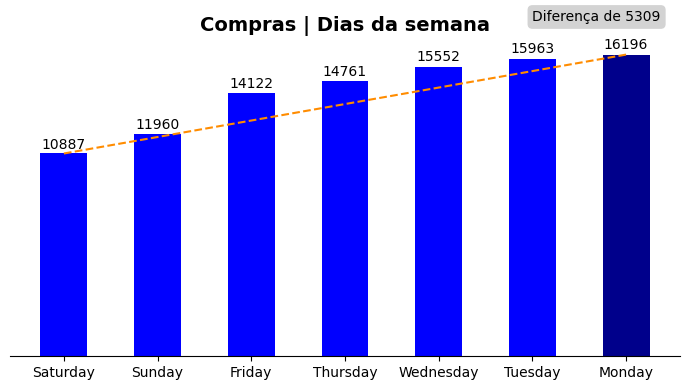

In [121]:
fig, ax = plt.subplots(figsize=(7,4), tight_layout=True)
w = 0.5
a = orders1.dia_semana_compra.value_counts().sort_values(ascending=True)
ax.bar(a.index, a.values, color='blue', width=w)
ax.spines[['top','left','right']].set_visible(False)
for i in range(len(a.index)):
    ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.02),ha='center')
    
# ax.bar(a.index[0], a.values[0], color='cornflowerblue', width=w)
ax.bar(a.index[-1], a.values[-1], color='darkblue', width=w)
ax.yaxis.set_visible(False)
ax.plot([a.index[0], a.index[-1]], [a.values[0],a.values[-1]],'--', color='darkorange')
ax.text(5, 18000, f'Diferença de {a.values[-1]-a.values[0]}', color='black', fontsize=10, bbox=dict(facecolor='lightgray', edgecolor='lightgray', boxstyle='round,pad=0.3'))
ax.set_title('Compras | Dias da semana', fontweight='bold', fontsize=14)

plt.savefig('../imagens/compras_dias_da_semana.png', transparent=True)
plt.show()

# **Aula 7 - Products**
- Categorias de produtos mais populares
- Categorias de produtos que mais dão problema com atrasos
- Relação do frete com as medidas do produto

In [122]:
products1 = products.copy()

In [123]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [124]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [125]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [126]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [127]:
products.duplicated().sum()

0

In [128]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [129]:
products.loc[products.product_category_name.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [130]:
cols = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
products.loc[products.product_category_name.isnull() & products.product_name_lenght.isnull() &
            products.product_description_lenght.isnull() & products.product_photos_qty.isnull(), cols] = 'Não informado'

In [131]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [132]:
products.loc[products.product_weight_g.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,Não informado,Não informado,Não informado,Não informado,NaN,NaN,NaN,NaN


In [133]:
products.loc[products.product_photos_qty == 'Não informado'].shape[0]

610

#### **Utilizando a base order_items1 para nossos insights**

In [134]:
order_items.shape

(98666, 8)

In [135]:
order_items.nunique()

order_id                 98666
order_item_id               17
product_id               31862
seller_id                 3084
shipping_limit_date      93009
price                     5887
freight_value             6756
product_category_name       73
dtype: int64

In [136]:
df_01 = order_items[['order_id','order_item_id','product_id','seller_id','price','freight_value']].copy()
df_01 = pd.merge(df_01, products[['product_id','product_category_name']], on='product_id', how='inner')
df_01.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff


In [137]:
df_01.shape

(98666, 7)

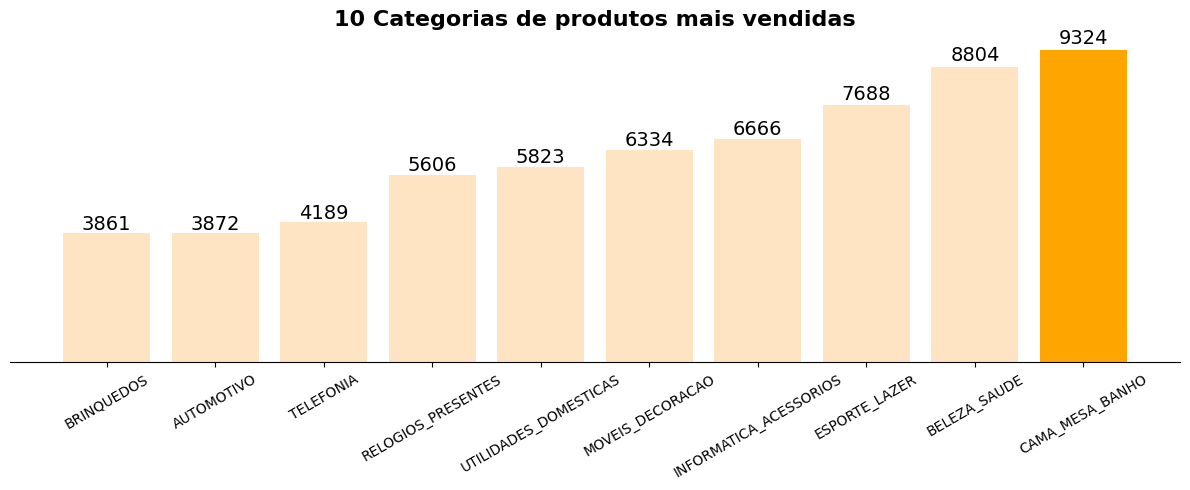

In [138]:
a = df_01.product_category_name.value_counts().head(10).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12,5),tight_layout=True)
ax.bar(a.index, a.values,color='bisque')
for i in range(10):
    ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.02), ha='center', fontsize=14)
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_title('10 Categorias de produtos mais vendidas', fontweight='bold',fontsize=16)

ax.bar(a.index[-1], a.values[-1],color='orange')

plt.xticks(rotation=30)
etiquetas_originais = [str(valor) for valor in a.index]
etiquetas_maiusculas = [etiqueta.upper() for etiqueta in etiquetas_originais]
plt.xticks(a.index, etiquetas_maiusculas)

plt.savefig('../imagens/categorias_produtos_.png', transparent=True)
plt.show()

# **8. Sellers**

In [139]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [140]:
sellers['seller_id_num'] = np.arange(0,sellers.shape[0])
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_id_num
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,0
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,1
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,2
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,3
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,4
...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,3090
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,3091
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,3092
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,3093


In [141]:
df_01 = pd.merge(df_01, sellers[['seller_id','seller_id_num']], on='seller_id', how='inner')
df_01.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,seller_id_num
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,513
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,cool_stuff,513
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,cool_stuff,513
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,cool_stuff,513
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,513


In [142]:
df_01.seller_id_num = df_01.seller_id_num.astype('str')

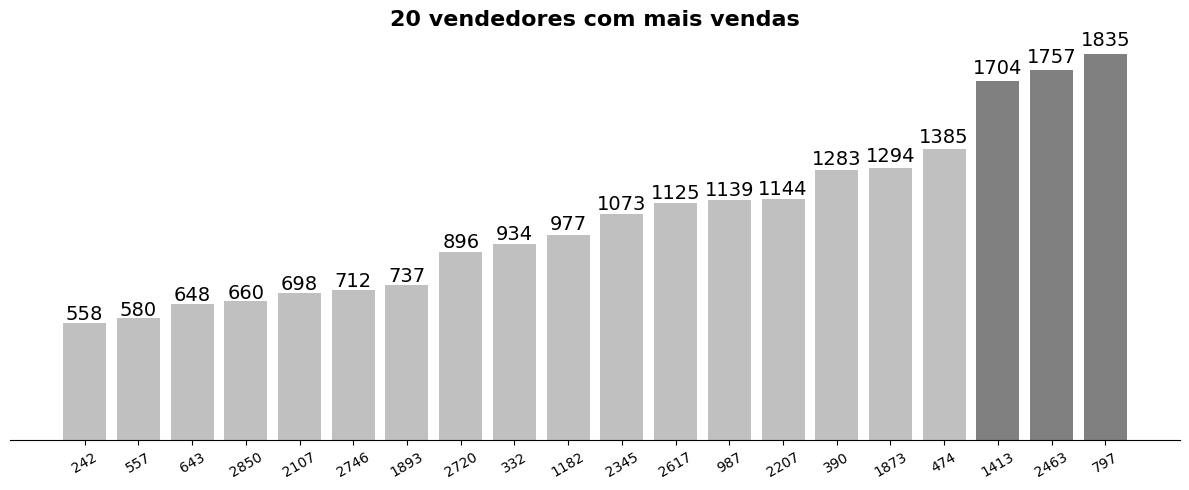

In [143]:
a = df_01.seller_id_num.value_counts().head(20).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12,5),tight_layout=True)
ax.bar(a.index, a.values,color='silver')
ax.bar(a.index[[-1,-2,-3]], a.values[[-1,-2,-3]],color='gray')

for i in range(20):
    ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.02), ha='center', fontsize=14)
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_title('20 vendedores com mais vendas', fontweight='bold',fontsize=16)

plt.xticks(rotation=30)
etiquetas_originais = [str(valor) for valor in a.index]
etiquetas_maiusculas = [etiqueta.upper() for etiqueta in etiquetas_originais]
plt.xticks(a.index, etiquetas_maiusculas)

plt.savefig('../imagens/vendedores_.png', transparent=True)
plt.show()

In [144]:
customers.to_csv('../bases_de_dados/bases_trabalhadas/customers_1.csv', index=False)
order_items.to_csv('../bases_de_dados/bases_trabalhadas/order_items_1.csv', index=False)
order_payments.to_csv('../bases_de_dados/bases_trabalhadas/order_payments_1.csv', index=False)
pedidos_e_avaliacoes.to_csv('../bases_de_dados/bases_trabalhadas/pedidos_e_avaliacoes.csv', index=False)
orders1.to_csv('../bases_de_dados/bases_trabalhadas/orders_1_.csv', index=False)
products.to_csv('../bases_de_dados/bases_trabalhadas/products_1.csv', index=False)
sellers.to_csv('../bases_de_dados/bases_trabalhadas/sellers_1.csv', index=False)